In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('Machine_data.xlsx')

In [3]:
df.head()

,LOAD,100 Hz,250 Hz,500 Hz,750 Hz,1000 Hz,1250 Hz,1450 Hz,P100 Hz,P250 Hz,...,Total P3,RATIO P1,RATIO P2,RATIO P3,std,median,skewness,kurtosis,mean,Target
0,0,6.007301,23.770984,28.760884,5.880903,3.311072,0.832553,0.949333,1.423058e-06,0.000015,...,0.000037,0.647000,5.443992,0.734265,0.071836,-0.009005,-1.285956,16.455835,0.826810,0
1,0,2.029413,17.099365,27.123521,7.187582,2.737462,0.892978,0.877451,6.892066e-09,0.000008,...,0.000028,0.630817,3.809521,0.756003,0.066430,0.009827,-2.236660,23.205088,0.829610,0
2,0,1.174266,10.086570,22.042091,5.828525,2.891719,0.475583,0.939424,9.464084e-08,0.000002,...,0.000015,0.598940,2.765214,0.764538,0.058336,0.001854,-2.820789,37.541688,0.817970,0
3,0,1.223565,15.597646,26.189650,6.394306,3.334334,1.232023,0.806859,6.445943e-08,0.000006,...,0.000025,0.618661,3.482559,0.752305,0.064363,0.005021,-2.348550,25.733966,0.823630,0
4,0,1.660257,22.486246,26.090762,5.547090,2.644630,1.193122,0.999081,4.309546e-08,0.000014,...,0.000032,0.647840,5.218655,0.739661,0.068290,0.008312,-2.019943,20.117138,0.824904,0


In [4]:
df.columns

Index(['LOAD', '100 Hz', '250 Hz', '500 Hz', '750 Hz', '1000 Hz', '1250 Hz',
       '1450 Hz', 'P100 Hz', 'P250 Hz', 'P500 Hz', 'P750 Hz', 'P1000 Hz',
       'P1250 Hz', 'P1450 Hz', 'RATIO1', 'RATIO2', 'RATIO3', 'RATIO4',
       'RATIO5', 'RATIO6', 'RATIO7', 'RATIO8', 'Total P', 'Total P3',
       'RATIO  P1', 'RATIO  P2', 'RATIO  P3', 'std', 'median', 'skewness',
       'kurtosis', 'mean', 'Target'],
      dtype='object')

In [5]:
sns.set_style('whitegrid')

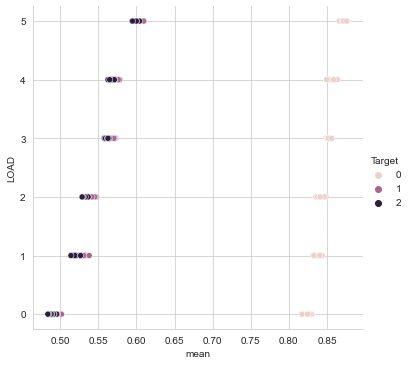

In [6]:
sns.relplot(x = 'mean', y = 'LOAD',data=df,hue = 'Target')
#plt.savefig('LOAD vs mean .png', dpi=300)

<AxesSubplot:>

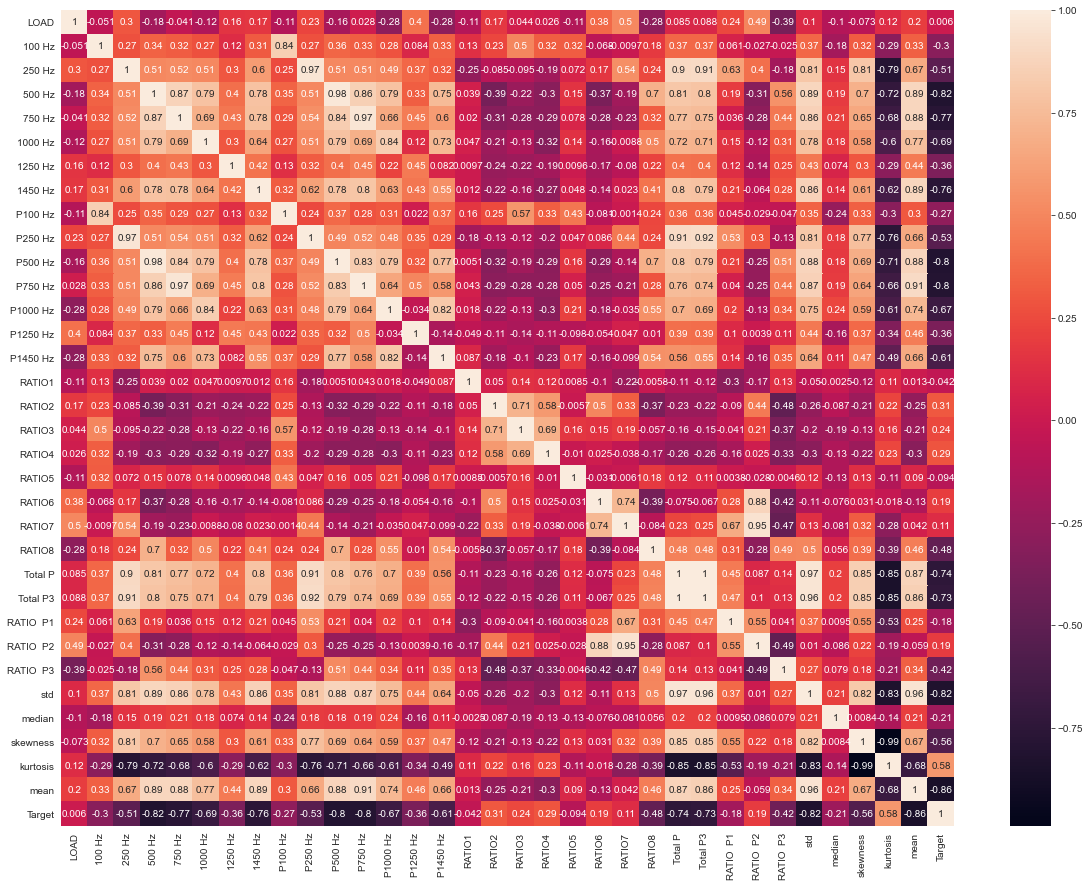

In [7]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), annot=True)
#plt.savefig('Corelation1.png', dpi=500)

In [8]:
x = df.iloc[:,:33]
y = df.iloc[:,-1]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 5,shuffle = True,stratify= np.array(y))

In [10]:
y_test

93     1
87     1
140    2
138    2
63     1
171    2
55     0
14     0
129    2
12     0
81     1
156    2
48     0
150    2
30     0
36     0
152    2
8      0
74     1
86     1
169    2
85     1
76     1
47     0
130    2
126    2
54     0
116    1
151    2
7      0
135    2
124    2
161    2
91     1
38     0
27     0
117    1
67     1
90     1
89     1
142    2
115    1
9      0
39     0
16     0
Name: Target, dtype: int64

# Mutual Information
Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

or we can say, this is the measure how well a given attribute or feature seperates the training examples according to their target classification.

In [11]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(x_train,y_train)
mutual_info

array([0.        , 0.03742223, 0.21709437, 0.64303184, 0.58414392,
       0.35947413, 0.17341915, 0.50589759, 0.09892786, 0.36392259,
       0.63087563, 0.60305935, 0.55661329, 0.26882792, 0.35217479,
       0.02085314, 0.18911305, 0.1271188 , 0.06218717, 0.06976796,
       0.05074148, 0.15953815, 0.15511112, 0.64147762, 0.60823216,
       0.08491649, 0.08814378, 0.18779003, 0.65070775, 0.37301729,
       0.35323264, 0.37213662, 0.81566004])

In [12]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x.columns
mutual_info.sort_values(ascending = False)

mean         0.815660
std          0.650708
500 Hz       0.643032
Total P      0.641478
P500 Hz      0.630876
Total P3     0.608232
P750 Hz      0.603059
750 Hz       0.584144
P1000 Hz     0.556613
1450 Hz      0.505898
median       0.373017
kurtosis     0.372137
P250 Hz      0.363923
1000 Hz      0.359474
skewness     0.353233
P1450 Hz     0.352175
P1250 Hz     0.268828
250 Hz       0.217094
RATIO2       0.189113
RATIO  P3    0.187790
1250 Hz      0.173419
RATIO7       0.159538
RATIO8       0.155111
RATIO3       0.127119
P100 Hz      0.098928
RATIO  P2    0.088144
RATIO  P1    0.084916
RATIO5       0.069768
RATIO4       0.062187
RATIO6       0.050741
100 Hz       0.037422
RATIO1       0.020853
LOAD         0.000000
dtype: float64

Text(0, 0.5, 'Mutual Information Gain')

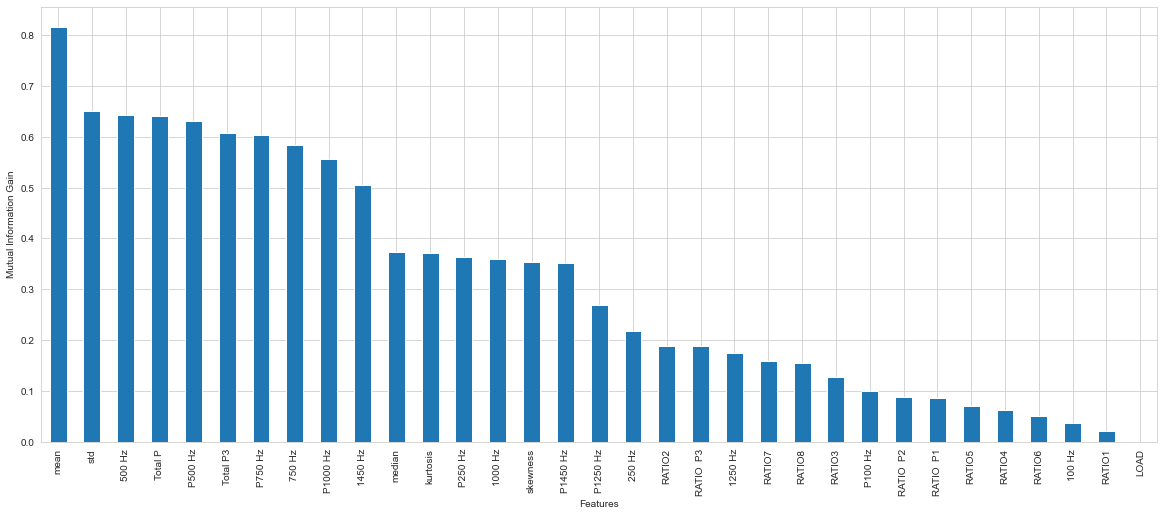

In [13]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20,8))
plt.xlabel('Features')
plt.ylabel('Mutual Information Gain')
#plt.savefig('Mutualinfo1.png', dpi=500)

# Selecting Best Feature

In [14]:
from sklearn.feature_selection import SelectKBest

In [40]:
sel_2_cols = SelectKBest(mutual_info_classif, k=5)
sel_2_cols.fit(x_train,y_train)
selected_feature = x_train.columns[sel_2_cols.get_support()]
selected_feature

Index(['500 Hz', 'P500 Hz', 'Total P', 'std', 'mean'], dtype='object')

In [41]:
x_train_selected = x_train[selected_feature]
x_train_selected.head()

,500 Hz,P500 Hz,Total P,std,mean
113,5.863668,7.828755e-07,0.000018,0.042406,0.60813
88,7.828248,1.780772e-06,0.000007,0.034961,0.54525
56,15.288244,5.675509e-06,0.000070,0.076783,0.87225
99,8.946562,1.967031e-06,0.000006,0.034144,0.57045
84,5.468487,6.551640e-07,0.000004,0.032374,0.54016


In [42]:
x_test_selected = x_test[selected_feature]
x_test_selected.head()

,500 Hz,P500 Hz,Total P,std,mean
93,7.668774,1.852069e-06,0.000013,0.040057,0.57297
87,7.840374,1.650818e-06,0.000004,0.032586,0.54447
140,5.522234,7.072142e-07,0.000009,0.036060,0.53564
138,9.239559,2.367833e-06,0.000005,0.032781,0.52674
63,10.356126,2.826074e-06,0.000009,0.034706,0.49448


In [43]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=9)

In [44]:
KNN.fit(x_train_selected,y_train)
y_pred = KNN.predict(x_test_selected)

Text(0, 0.5, 'True')

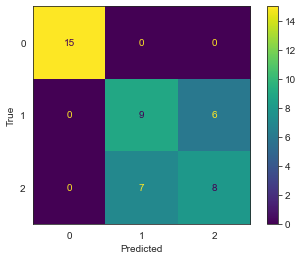

In [45]:
sns.set_style(style='white')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN,x_test_selected,y_test,include_values=True)
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.show()
#plt.savefig('Confusion Matrix2.png.png', dpi=500)

In [46]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[15,  0,  0],
       [ 0,  9,  6],
       [ 0,  7,  8]], dtype=int64)

In [47]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_pred,y_test)

In [48]:
accuracy

0.7111111111111111

In [49]:
y_pred

array([2, 2, 1, 1, 1, 2, 0, 0, 2, 0, 1, 1, 0, 2, 0, 0, 2, 0, 1, 1, 2, 2,
       2, 0, 1, 2, 0, 1, 2, 0, 1, 2, 1, 1, 0, 0, 1, 2, 1, 1, 1, 2, 0, 0,
       0], dtype=int64)

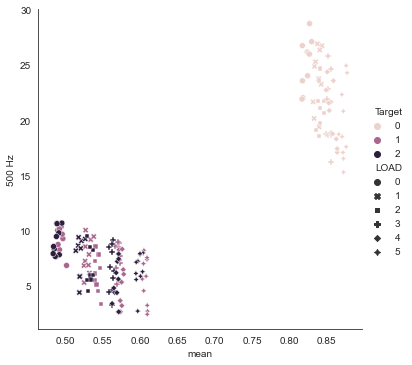

In [50]:
sns.relplot(x = 'mean',y = '500 Hz',style='LOAD',data = df, hue='Target')
#plt.savefig('std vs mean2.png', dpi=500)

# Model Selection

In [51]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [52]:
x_train_selected_concat = pd.concat((x_train_selected,x_test_selected),axis = 0)

In [53]:
y_train_concat = pd.concat((y_train,y_test),axis = 0)

In [54]:
lr_score = cross_val_score(LogisticRegression(),x_train_selected_concat,y_train_concat)
print(lr_score)
lr_score.mean()

[0.63888889 0.66666667 0.66666667 0.75       0.62857143]


0.6701587301587301

In [55]:
dt_score = cross_val_score(DecisionTreeClassifier(),x_train_selected_concat,y_train_concat)
print(dt_score)
dt_score.mean()

[0.83333333 0.66666667 0.77777778 0.72222222 0.8       ]


0.76

In [56]:
svc_score = cross_val_score(SVC(kernel='rbf'),x_train_selected_concat,y_train_concat)
print(svc_score)
svc_score.mean()

[0.66666667 0.66666667 0.66666667 0.66666667 0.62857143]


0.659047619047619

In [57]:
knn_score = cross_val_score(KNeighborsClassifier(n_neighbors=5),x_train_selected_concat,y_train_concat)
print(knn_score)
knn_score.mean()

[0.66666667 0.58333333 0.72222222 0.72222222 0.71428571]


0.6817460317460318

# Hyperparameter tuning

In [58]:
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[3,5,7,9,11], 'weights':['uniform', 'distance'], 'p':[1,2]}
grid = GridSearchCV(KNeighborsClassifier(), parameters,  scoring= 'accuracy', refit = True, verbose = 2 )
grid.fit(x_train_selected,y_train)
best_params = grid.best_params_
best_params

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=uniform .............................
[CV] .............. n_neighbors=3, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ............. n_neighbors=3, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=3, p=1, weights=distance ............................
[CV] ..........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] .............. n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] .............. n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] .............. n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] .............. n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=5, p=1, weights=uniform .............................
[CV] .............. n_neighbors=5, p=1, weights=uniform, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV] ............. n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=5, p=1, weights=distance ............................
[CV] .

[CV] ............ n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=11, p=1, weights=distance ...........................
[CV] ............ n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=11, p=1, weights=distance ...........................
[CV] ............ n_neighbors=11, p=1, weights=distance, total=   0.0s
[CV] n_neighbors=11, p=2, weights=uniform ............................
[CV] ............. n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=11, p=2, weights=uniform ............................
[CV] ............. n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=11, p=2, weights=uniform ............................
[CV] ............. n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=11, p=2, weights=uniform ............................
[CV] ............. n_neighbors=11, p=2, weights=uniform, total=   0.0s
[CV] n_neighbors=11, p=2, weights=uniform ............................
[CV] .

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished


{'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}

In [72]:
KNN = KNeighborsClassifier(n_neighbors =  3, p = 2, weights = 'distance')
KNN.fit(x_train_selected,y_train)
y_pred = KNN.predict(x_test_selected)

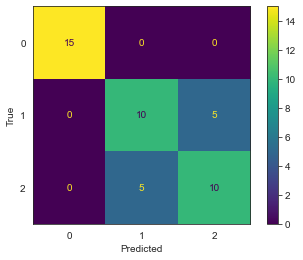

In [73]:
sns.set_style(style='white')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN,x_test_selected,y_test,include_values=True)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

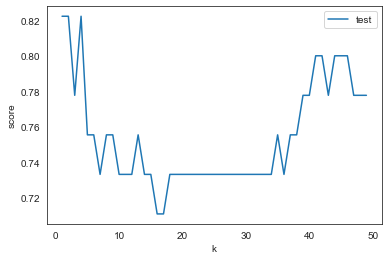

In [81]:
KNN_accuracy_test = []
KNN_accuracy_train = []

for k in range (1,50):
    KNN = KNeighborsClassifier(n_neighbors =  k, p = 2, weights = 'distance')
    KNN.fit(x_train_selected,y_train)
    KNN_accuracy_train.append(KNN.score(x_train_selected,y_train))
    KNN_accuracy_test.append(KNN.score(x_test_selected,y_test))

#plt.plot(np.arange(1,50), KNN_accuracy_train, label = 'train')
plt.plot(np.arange(1,50), KNN_accuracy_test, label = 'test')
plt.xlabel('k')
plt.ylabel('score')
plt.legend()
#plt.show()
#plt.savefig('Overfitting_Underfitting1.png', dpi=500)    

In [82]:
pd.Series(KNN_accuracy_test) # we can see that at k = 4 accuracy is good

0     0.822222
1     0.822222
2     0.777778
3     0.822222
4     0.755556
5     0.755556
6     0.733333
7     0.755556
8     0.755556
9     0.733333
10    0.733333
11    0.733333
12    0.755556
13    0.733333
14    0.733333
15    0.711111
16    0.711111
17    0.733333
18    0.733333
19    0.733333
20    0.733333
21    0.733333
22    0.733333
23    0.733333
24    0.733333
25    0.733333
26    0.733333
27    0.733333
28    0.733333
29    0.733333
30    0.733333
31    0.733333
32    0.733333
33    0.733333
34    0.755556
35    0.733333
36    0.755556
37    0.755556
38    0.777778
39    0.777778
40    0.800000
41    0.800000
42    0.777778
43    0.800000
44    0.800000
45    0.800000
46    0.777778
47    0.777778
48    0.777778
dtype: float64

In [83]:
KNN = KNeighborsClassifier(n_neighbors =  4, p = 2, weights = 'distance')
KNN.fit(x_train_selected,y_train)
y_pred = KNN.predict(x_test_selected)

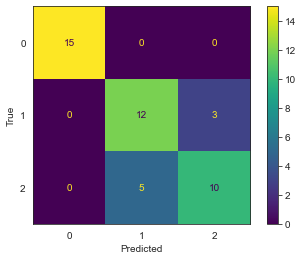

In [84]:
sns.set_style(style='white')
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(KNN,x_test_selected,y_test,include_values=True)
plt.xlabel('Predicted')
plt.ylabel('True')
#plt.show()
plt.savefig('Confusion Matrix2.png', dpi=300)